In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline 
%pylab inline
import seaborn as sns
sns.set(color_codes=True)

from scipy import stats
import math
from statsmodels.stats import weightstats as stests

Populating the interactive namespace from numpy and matplotlib


In [3]:
data=pd.read_csv(r'C:\Users\Amar\Desktop\cricket data new.csv')

In [4]:
data

,player_name,score,sixes,fours,overs,extras,wickets,balls,runs_given,home,away,innings,match_id
0,AJ Finch,12,0,2,3,1,0,9,0,Australia,Sri Lanka,1,1001351
1,AJ Turner,7,0,0,0,0,1,6,15,Australia,Sri Lanka,1,1001351
2,AJ Tye,0,0,0,1,4,3,1,36,Australia,Sri Lanka,1,1001351
3,BR Dunk,32,3,3,2,0,0,14,0,Australia,Sri Lanka,1,1001351
4,JA Richardson,0,0,0,1,0,1,1,24,Australia,Sri Lanka,1,1001351
5,JP Faulkner,1,0,0,2,0,2,2,32,Australia,Sri Lanka,1,1001351
6,M Klinger,43,1,2,1,2,0,37,0,Australia,Sri Lanka,1,1001351
7,MC Henriques,56,2,2,1,1,0,37,35,Australia,Sri Lanka,1,1001351
8,PJ Cummins,3,0,0,3,0,1,3,27,Australia,Sri Lanka,1,1001351
9,TD Paine,7,0,1,4,0,0,4,0,Australia,Sri Lanka,1,1001351


In [5]:
data_first=data[['player_name','balls','innings','match_id','home','away','fours','sixes','balls']]
data_first

,player_name,balls,innings,match_id,home,away,fours,sixes,balls
0,AJ Finch,9,1,1001351,Australia,Sri Lanka,2,0,9
1,AJ Turner,6,1,1001351,Australia,Sri Lanka,0,0,6
2,AJ Tye,1,1,1001351,Australia,Sri Lanka,0,0,1
3,BR Dunk,14,1,1001351,Australia,Sri Lanka,3,3,14
4,JA Richardson,1,1,1001351,Australia,Sri Lanka,0,0,1
5,JP Faulkner,2,1,1001351,Australia,Sri Lanka,0,0,2
6,M Klinger,37,1,1001351,Australia,Sri Lanka,2,1,37
7,MC Henriques,37,1,1001351,Australia,Sri Lanka,2,2,37
8,PJ Cummins,3,1,1001351,Australia,Sri Lanka,0,0,3
9,TD Paine,4,1,1001351,Australia,Sri Lanka,1,0,4


In [6]:
data_second=data.groupby(['match_id','home','away','innings'],as_index=False).agg({'score':"sum",'fours':"sum",'sixes':"sum"})
data_second

,match_id,home,away,innings,score,fours,sixes
0,211028,England,Australia,1,173,19,3
1,211028,England,Australia,2,73,10,0
2,211048,New Zealand,Australia,1,202,15,12
3,211048,New Zealand,Australia,2,168,17,5
4,222678,South Africa,New Zealand,1,125,14,3
5,222678,South Africa,New Zealand,2,123,12,3
6,225263,England,Pakistan,1,133,17,1
7,225263,England,Pakistan,2,138,18,3
8,225271,England,Sri Lanka,1,151,12,4
9,225271,England,Sri Lanka,2,148,17,1


In [7]:
data_third=data_second[data_second['innings']==1]
data_third

,match_id,home,away,innings,score,fours,sixes
0,211028,England,Australia,1,173,19,3
2,211048,New Zealand,Australia,1,202,15,12
4,222678,South Africa,New Zealand,1,125,14,3
6,225263,England,Pakistan,1,133,17,1
8,225271,England,Sri Lanka,1,151,12,4
10,238195,South Africa,Australia,1,184,19,7
12,249227,Australia,England,1,217,15,14
14,251487,New Zealand,Sri Lanka,1,150,13,6
16,251488,New Zealand,Sri Lanka,1,103,10,3
18,255954,South Africa,India,1,113,9,4


In [8]:
data_fourth=data_second[data_second['innings']==2]
data_fourth

,match_id,home,away,innings,score,fours,sixes
1,211028,England,Australia,2,73,10,0
3,211048,New Zealand,Australia,2,168,17,5
5,222678,South Africa,New Zealand,2,123,12,3
7,225263,England,Pakistan,2,138,18,3
9,225271,England,Sri Lanka,2,148,17,1
11,238195,South Africa,Australia,2,191,16,9
13,249227,Australia,England,2,132,13,1
15,251487,New Zealand,Sri Lanka,2,59,10,1
17,251488,New Zealand,Sri Lanka,2,108,15,2
19,255954,South Africa,India,2,116,14,3


In [9]:
merge=pd.merge(data_third,data_fourth,on='match_id')
merge

,match_id,home_x,away_x,innings_x,score_x,fours_x,sixes_x,home_y,away_y,innings_y,score_y,fours_y,sixes_y
0,211028,England,Australia,1,173,19,3,England,Australia,2,73,10,0
1,211048,New Zealand,Australia,1,202,15,12,New Zealand,Australia,2,168,17,5
2,222678,South Africa,New Zealand,1,125,14,3,South Africa,New Zealand,2,123,12,3
3,225263,England,Pakistan,1,133,17,1,England,Pakistan,2,138,18,3
4,225271,England,Sri Lanka,1,151,12,4,England,Sri Lanka,2,148,17,1
5,238195,South Africa,Australia,1,184,19,7,South Africa,Australia,2,191,16,9
6,249227,Australia,England,1,217,15,14,Australia,England,2,132,13,1
7,251487,New Zealand,Sri Lanka,1,150,13,6,New Zealand,Sri Lanka,2,59,10,1
8,251488,New Zealand,Sri Lanka,1,103,10,3,New Zealand,Sri Lanka,2,108,15,2
9,255954,South Africa,India,1,113,9,4,South Africa,India,2,116,14,3


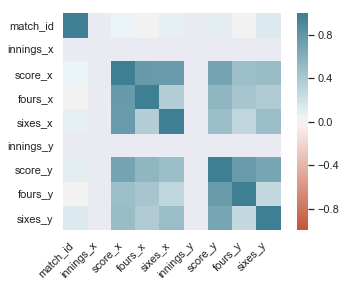

In [10]:
corr = merge.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='left'
);

In [10]:
data_x=merge[['innings_x','match_id','home_x','score_x','fours_x','sixes_x']]
data_x

,innings_x,match_id,home_x,score_x,fours_x,sixes_x
0,1,211028,England,173,19,3
1,1,211048,New Zealand,202,15,12
2,1,222678,South Africa,125,14,3
3,1,225263,England,133,17,1
4,1,225271,England,151,12,4
5,1,238195,South Africa,184,19,7
6,1,249227,Australia,217,15,14
7,1,251487,New Zealand,150,13,6
8,1,251488,New Zealand,103,10,3
9,1,255954,South Africa,113,9,4


In [11]:
data_x1=merge[['innings_x','match_id','home_x','score_x']]
data_x1

,innings_x,match_id,home_x,score_x
0,1,211028,England,173
1,1,211048,New Zealand,202
2,1,222678,South Africa,125
3,1,225263,England,133
4,1,225271,England,151
5,1,238195,South Africa,184
6,1,249227,Australia,217
7,1,251487,New Zealand,150
8,1,251488,New Zealand,103
9,1,255954,South Africa,113


In [12]:
con = data_x1[data_x1['score_x'] >50]

In [13]:
con

,innings_x,match_id,home_x,score_x
0,1,211028,England,173
1,1,211048,New Zealand,202
2,1,222678,South Africa,125
3,1,225263,England,133
4,1,225271,England,151
5,1,238195,South Africa,184
6,1,249227,Australia,217
7,1,251487,New Zealand,150
8,1,251488,New Zealand,103
9,1,255954,South Africa,113


In [14]:
data_y1=merge[['innings_y','match_id','away_y','score_y']]
data_y1

,innings_y,match_id,away_y,score_y
0,2,211028,Australia,73
1,2,211048,Australia,168
2,2,222678,New Zealand,123
3,2,225263,Pakistan,138
4,2,225271,Sri Lanka,148
5,2,238195,Australia,191
6,2,249227,England,132
7,2,251487,Sri Lanka,59
8,2,251488,Sri Lanka,108
9,2,255954,India,116


In [15]:
data_y=merge[['innings_y','match_id','away_y','fours_y','score_y']]
data_y

,innings_y,match_id,away_y,fours_y,score_y
0,2,211028,Australia,10,73
1,2,211048,Australia,17,168
2,2,222678,New Zealand,12,123
3,2,225263,Pakistan,18,138
4,2,225271,Sri Lanka,17,148
5,2,238195,Australia,16,191
6,2,249227,England,13,132
7,2,251487,Sri Lanka,10,59
8,2,251488,Sri Lanka,15,108
9,2,255954,India,14,116


In [16]:
con_1 = data_y1[data_y1['score_y'] >50]

In [17]:
con_1

,innings_y,match_id,away_y,score_y
0,2,211028,Australia,73
1,2,211048,Australia,168
2,2,222678,New Zealand,123
3,2,225263,Pakistan,138
4,2,225271,Sri Lanka,148
5,2,238195,Australia,191
6,2,249227,England,132
7,2,251487,Sri Lanka,59
8,2,251488,Sri Lanka,108
9,2,255954,India,116


In [18]:
final=pd.merge(con,con_1,on='match_id')
final

,innings_x,match_id,home_x,score_x,innings_y,away_y,score_y
0,1,211028,England,173,2,Australia,73
1,1,211048,New Zealand,202,2,Australia,168
2,1,222678,South Africa,125,2,New Zealand,123
3,1,225263,England,133,2,Pakistan,138
4,1,225271,England,151,2,Sri Lanka,148
5,1,238195,South Africa,184,2,Australia,191
6,1,249227,Australia,217,2,England,132
7,1,251487,New Zealand,150,2,Sri Lanka,59
8,1,251488,New Zealand,103,2,Sri Lanka,108
9,1,255954,South Africa,113,2,India,116


In [20]:
hyp = data.groupby(
   ['match_id']
).agg(
    {
         'score':"sum"    
           
        
    }
)


In [21]:
hyp

,score
match_id,
211028,246
211048,370
222678,248
225263,271
225271,299
238195,375
249227,349
251487,209
251488,211


In [22]:
hyp3 = hyp[hyp['score'] >200]

In [23]:
hyp3

,score
match_id,
211028,246
211048,370
222678,248
225263,271
225271,299
238195,375
249227,349
251487,209
251488,211


Text(0.5, 0.98, 'Analyzing distribution for the series')

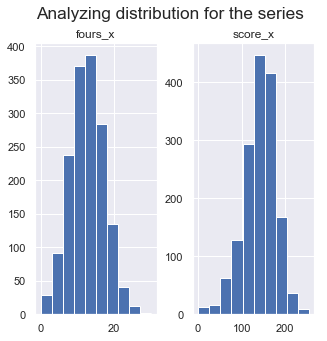

In [25]:
data_x.hist(
    column=["score_x", "fours_x", "home_x"],
    figsize=(5, 5)
    
)
pylab.suptitle("Analyzing distribution for the series", fontsize="xx-large")

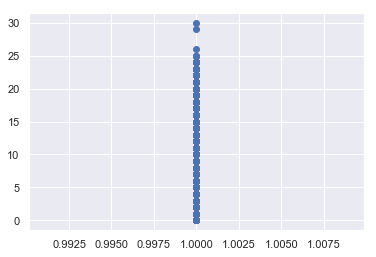

In [26]:
plt.scatter(data_third['innings'], data_third['fours']) 
plt.show() 

Text(0.5, 0.98, 'Analyzing distribution for the series')

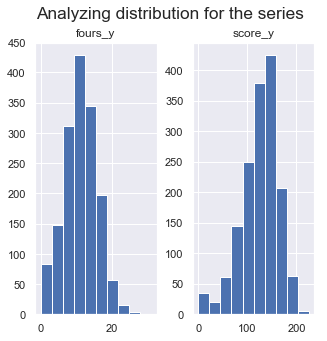

In [29]:
data_y.hist(
    column=["score_y", "fours_y", "away_y"],
    figsize=(5, 5)
    
)
pylab.suptitle("Analyzing distribution for the series", fontsize="xx-large")

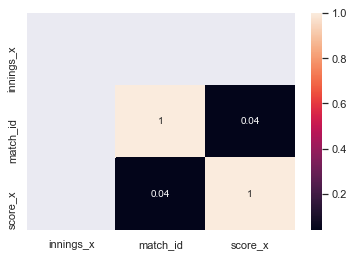

In [30]:
sns.heatmap(con.corr(),annot=True)

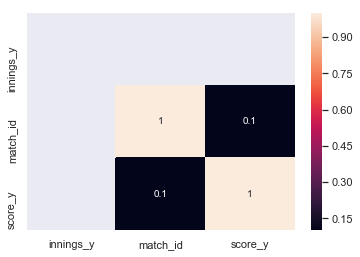

In [31]:
sns.heatmap(con_1.corr(),annot=True)

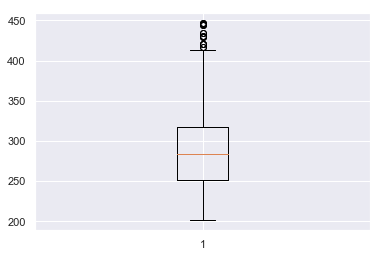

In [32]:
hyp3.plot.box() 
  
plt.boxplot(hyp3['score']) 
plt.show()

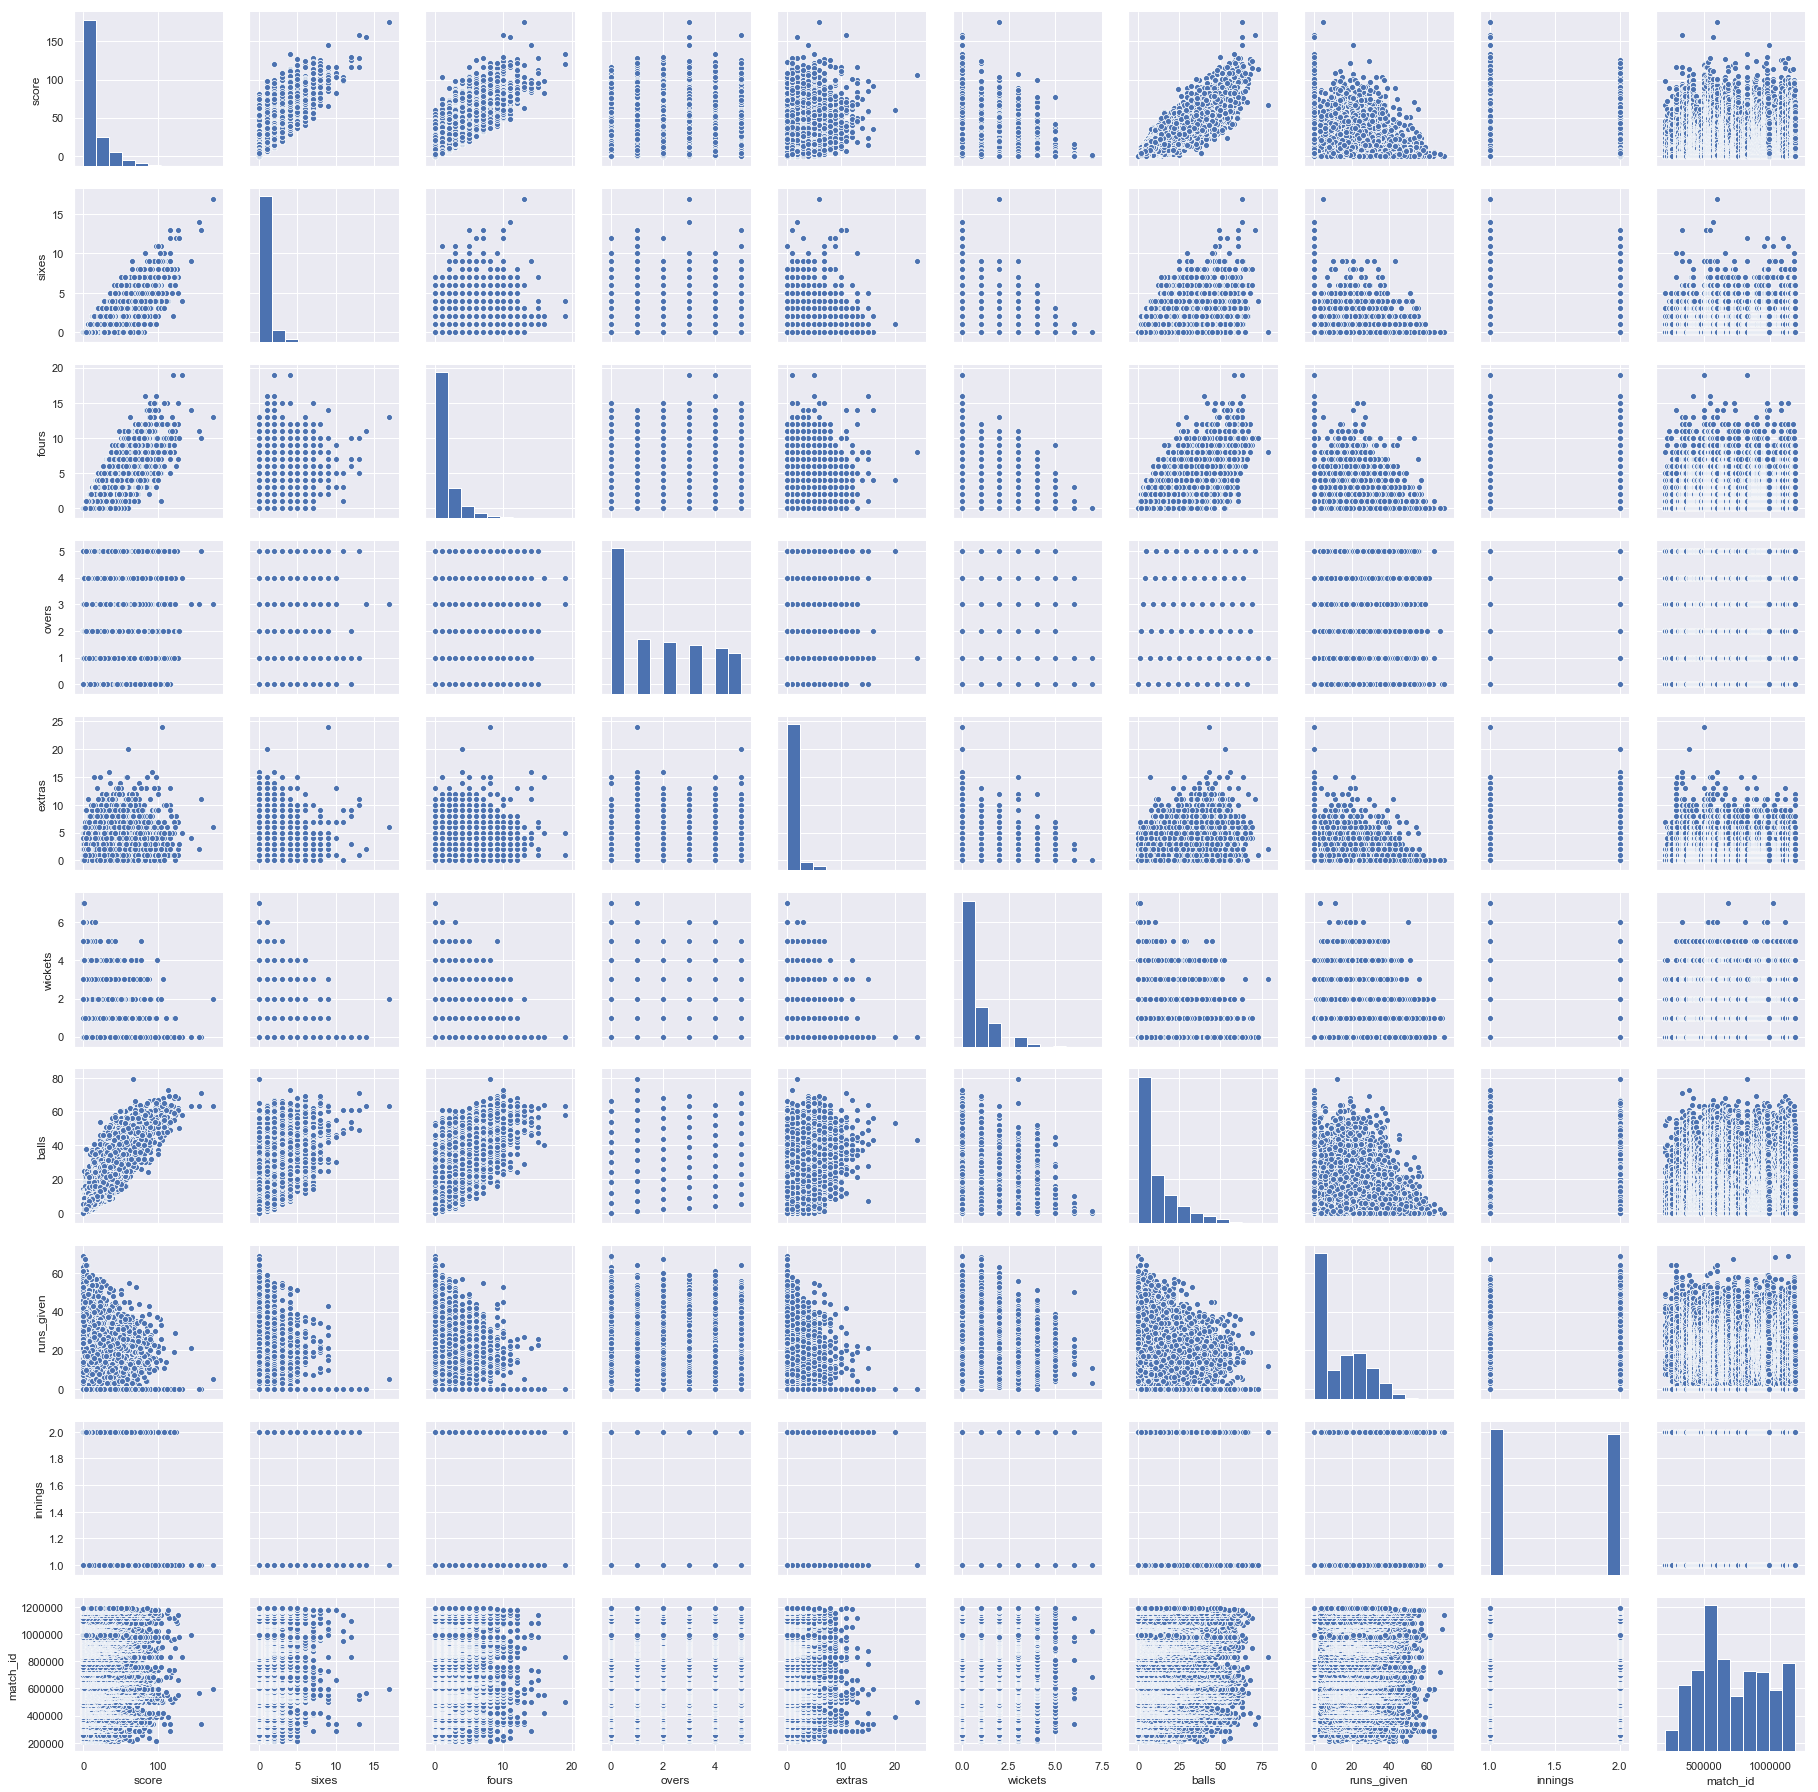

In [33]:
sns.pairplot(data)

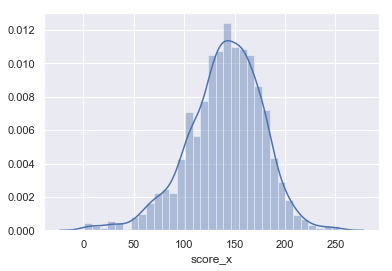

In [34]:
sns.distplot(merge['score_x'])

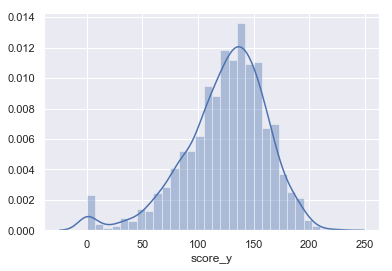

In [35]:
sns.distplot(merge['score_y'])

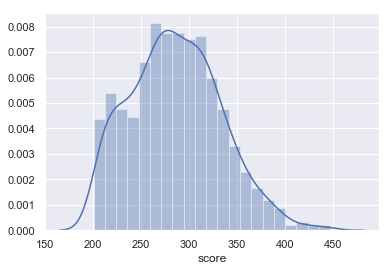

In [206]:
sns.distplot(hyp3['score'])

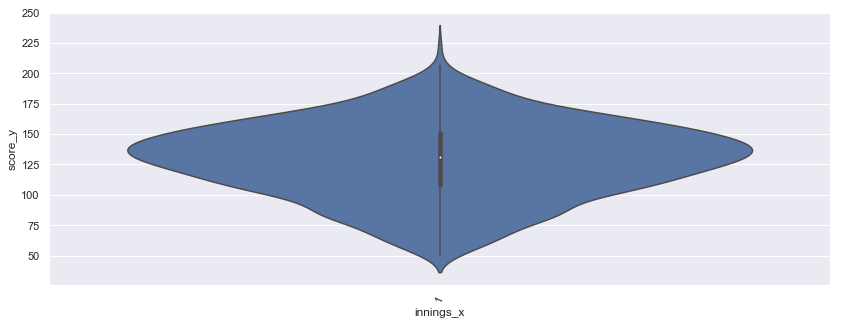

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 5)

ax = sns.violinplot(x="innings_x", y="score_y", data=final)
plt.xticks(rotation=65)
plt.show()

In [36]:
z=data_x.score_x.mean()

In [37]:
z

140.47795969773298

In [39]:
stats.ttest_1samp(data,140)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [40]:
merge.describe()

,match_id,innings_x,score_x,fours_x,sixes_x,innings_y,score_y,fours_y,sixes_y
count,1.588000e+03,1588.0,1588.000000,1588.000000,1588.000000,1588.0,1588.000000,1588.000000,1588.000000
mean,7.277613e+05,1.0,140.477960,12.073048,4.642947,2.0,124.474811,11.224811,3.925693
std,2.609006e+05,0.0,36.856268,4.653970,3.403967,0.0,37.678874,4.609840,2.974925
min,2.110280e+05,1.0,1.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000
25%,5.329495e+05,1.0,119.750000,9.000000,2.000000,2.0,104.750000,8.000000,2.000000
50%,6.829200e+05,1.0,143.000000,12.000000,4.000000,2.0,129.000000,11.000000,4.000000
75%,9.513995e+05,1.0,165.000000,15.000000,7.000000,2.0,150.000000,14.000000,6.000000
max,1.192224e+06,1.0,254.000000,30.000000,21.000000,2.0,225.000000,31.000000,19.000000


In [209]:
score_y= np.random.randint(0, 50, 1000)
score_x = np.random.randint(0, 50, 1000)

np.corrcoef(score_y, score_x)

array([[ 1.        , -0.03879759],
       [-0.03879759,  1.        ]])

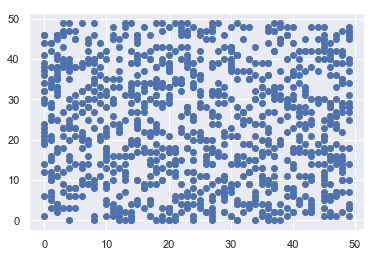

In [210]:
plt.scatter(score_y, score_x)
plt.show()

In [211]:
con.corr()

,innings_x,match_id,score_x,fours_x,sixes_x
innings_x,NaN,NaN,NaN,NaN,NaN
match_id,NaN,1.000000,0.040164,-0.039266,0.075208
score_x,NaN,0.040164,1.000000,0.751632,0.767509
fours_x,NaN,-0.039266,0.751632,1.000000,0.337231
sixes_x,NaN,0.075208,0.767509,0.337231,1.000000


In [212]:
con_1.corr()

,innings_y,match_id,score_y,fours_y,sixes_y
innings_y,NaN,NaN,NaN,NaN,NaN
match_id,NaN,1.000000,0.100817,0.024069,0.134466
score_y,NaN,0.100817,1.000000,0.691328,0.679751
fours_y,NaN,0.024069,0.691328,1.000000,0.200342
sixes_y,NaN,0.134466,0.679751,0.200342,1.000000


In [213]:
hyp3.corr()

,score
score,1.0


In [52]:
stats.ttest_rel(merge['score_x'], merge['score_y'])

Ttest_relResult(statistic=21.938447851456715, pvalue=2.170158820154923e-93)

In [45]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inlinefrom sklearn import metrics

UsageError: unrecognized arguments: sklearn import metrics


In [46]:
X = final['score_x'].values.reshape(-1,1)
y = final['score_y'].values.reshape(-1,1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
print(regressor.intercept_)
print(regressor.coef_)

[38.60236908]
[[0.62959489]]


In [50]:
y_pred = regressor.predict(X_test)

d = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
d

,Actual,Predicted
0,122,133.041603
1,114,109.116997
2,116,109.746592
3,145,126.745654
4,93,93.377125
5,78,104.709833
6,135,154.447829
7,135,139.967147
8,151,139.967147
9,118,139.967147


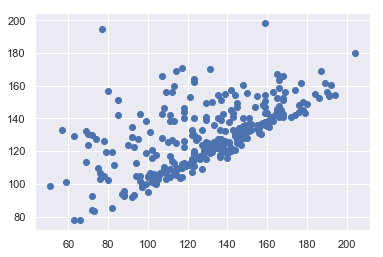

In [51]:
plt.scatter(y_test,y_pred)